In [1]:
import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import tensorflow
tensorflow.__version__

'2.6.2'

### Data Preparation

In [4]:
train_dir = '/Users/muzalevskiy/Downloads/train'
valid_dir = '/Users/muzalevskiy/Downloads/val'

In [5]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(10000)]
# for fname in fnames:
#     src = os.path.join(dataset_dir, fname)
#     dst = os.path.join(train_dir_cat, fname)
#     shutil.copyfile(src, dst)

### Model Creation

In [6]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.compile(loss='binary_crossentropy',\
             optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),\
             metrics=['acc'])

#### Answer for Question №1: binary crossentropy

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


#### Answer for Question №2: 11 215 873

### Data Generators

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [11]:
validation_generator = val_datagen.flow_from_directory(valid_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


### Model fitting and Accuracy/Loss Evaluation

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 27s 268ms/step - loss: 0.6947 - acc: 0.5145 - val_loss: 0.6916 - val_acc: 0.5460
Epoch 2/10
100/100 [==============================] - 25s 249ms/step - loss: 0.6910 - acc: 0.5195 - val_loss: 0.6825 - val_acc: 0.5660
Epoch 3/10
100/100 [==============================] - 25s 248ms/step - loss: 0.6854 - acc: 0.5565 - val_loss: 0.6804 - val_acc: 0.5650
Epoch 4/10
100/100 [==============================] - 24s 240ms/step - loss: 0.6848 - acc: 0.5550 - val_loss: 0.6766 - val_acc: 0.5810
Epoch 5/10
100/100 [==============================] - 24s 239ms/step - loss: 0.6770 - acc: 0.5760 - val_loss: 0.6777 - val_acc: 0.5620
Epoch 6/10
100/100 [==============================] - 24s 242ms/step - loss: 0.6753 - acc: 0.5755 - val_loss: 0.6691 - val_acc: 0.5940
Epoch 7/10
100/100 [==============================] - 24s 242ms/step - loss: 0.6697 - acc: 0.5795 - val_loss: 0.6612 - val_acc: 0.6380
Epoch 8/10
100/100 [==============================] - 2

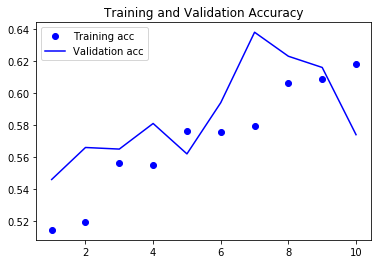

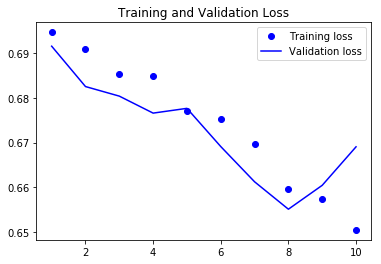

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [15]:
acc_median = np.median(acc)
acc_median

0.5757499933242798

#### Answer for Question №3: 0.56

In [16]:
loss_std = np.std(loss)
loss_std

0.014268752242510813

#### Answer for Question №4: 0.01

### Data Augmentation

In [17]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
from tensorflow.keras.preprocessing import image

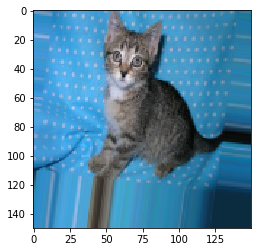

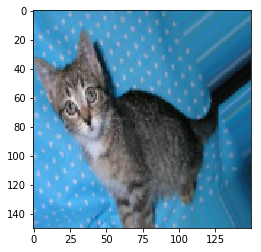

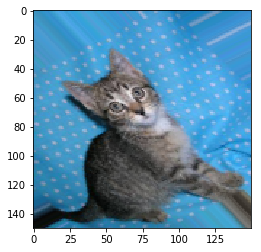

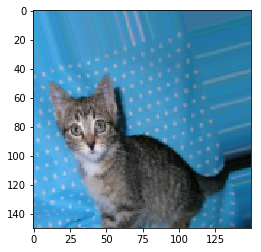

In [19]:
fnames = [os.path.join(train_dir+"/cats", fname) for
    fname in os.listdir(train_dir+"/cats")]

img_path = fnames[0]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [22]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [23]:
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


### Model fitting (augmented) and Accuracy/Loss Evaluation

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 57s 574ms/step - loss: 0.6704 - acc: 0.5834 - val_loss: 0.6430 - val_acc: 0.6306
Epoch 2/10
100/100 [==============================] - 56s 562ms/step - loss: 0.6659 - acc: 0.5872 - val_loss: 0.6434 - val_acc: 0.6194
Epoch 3/10
100/100 [==============================] - 58s 580ms/step - loss: 0.6631 - acc: 0.5994 - val_loss: 0.6432 - val_acc: 0.6125
Epoch 4/10
100/100 [==============================] - 61s 609ms/step - loss: 0.6638 - acc: 0.5878 - val_loss: 0.6418 - val_acc: 0.6212
Epoch 5/10
100/100 [==============================] - 64s 638ms/step - loss: 0.6592 - acc: 0.6006 - val_loss: 0.6370 - val_acc: 0.6219
Epoch 6/10
100/100 [==============================] - 66s 660ms/step - loss: 0.6559 - acc: 0.6069 - val_loss: 0.6332 - val_acc: 0.6344
Epoch 7/10
100/100 [==============================] - 64s 636ms/step - loss: 0.6531 - acc: 0.6094 - val_loss: 0.6378 - val_acc: 0.6187
Epoch 8/10
100/100 [==============================] - 6

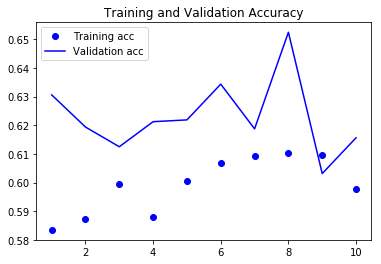

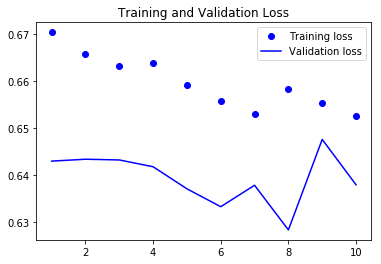

In [25]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [26]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.6393137753009797

#### Answer for Question №5: 0.67

In [27]:
val_acc_aug[5:10]

[0.6343749761581421,
 0.6187499761581421,
 0.6524999737739563,
 0.6031249761581421,
 0.6156250238418579]

In [28]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.6248749852180481

#### Answer for Question №6: 0.65